# Premier programme d'apprentissage machine

aujourd'hui je vais effectuer un premier programme ou l'ordinateur va apprendre à résoudre notre problème, il va crée une fonction linéaire en minimisant le taux d'erreur sur un data set que  je vais lui fournir 

___

Si dessous je vais générer un nuage de point linéaire pour pouvoir laisser la machine trouver la focntion linéaire qui traversera le nuage de point avec un taux d'erreur minimum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor

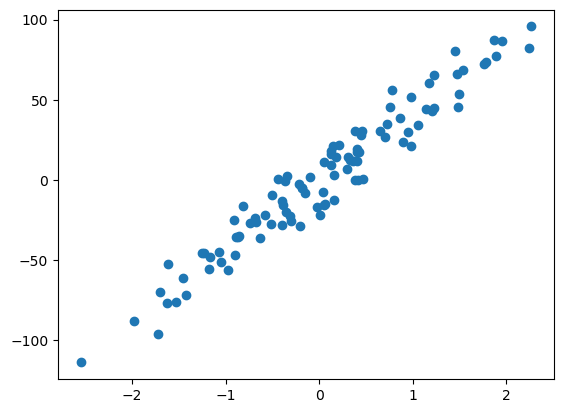

In [2]:
np.random.seed(0)
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y)

## Place à la machine

Maitenant que j'ai généré un nuage de point permettant d'y tracer une fonction linéaire. c'est l'heure de laisser la place à la machine si dessous je vais entrainer la machine avec la fonction [SGDRegressor] pour laisser la machine s'entrainer sur les calcule de la décente de gradient. Ensuite nous alons générer le modéle entrainer avec sont taux de fiabilité

In [3]:
model = SGDRegressor(max_iter=10000, eta0=0.001) #Les paramètre permette d'entrainer le modèle au mieux 
model.fit(x, y)

SGDRegressor(eta0=0.001, max_iter=10000)

Coeff R2 = 0.9416567569675361


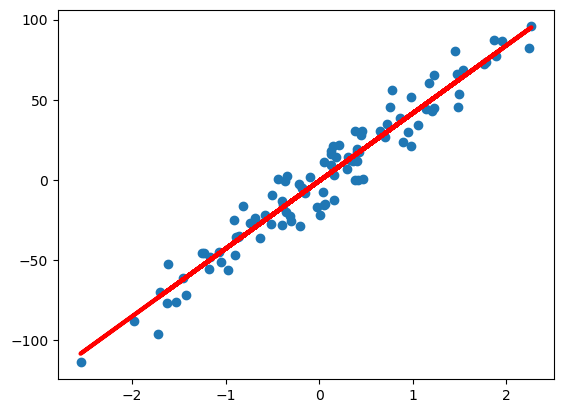

In [4]:
print('Coeff R2 =', model.score(x, y)) #affiche le taux de fiabilité du modèle
plt.scatter(x, y)
plt.plot(x, model.predict(x), c='red', lw = 3)

# Une vie d'imprévue

Magnifique nous avons généré un modèle avec un taux de fiabilité de 94% mais ce n'est qu'un modèle linéaire et la vie n'est jamais linéaire une infinité de paramètre peuvent influé sur nos données ce qqui fait que nos modèle ne sont jamais vraiment linèaire voilà pour quoi nous allon nousattaquer au fonction du second degré de type f(x) = ax²+ bx + c aussi appelé Régréssion Polynômiale

In [9]:
from sklearn.preprocessing import PolynomialFeatures #imporation d'un module pour généré des nuage de point polynomial

(100, 2)

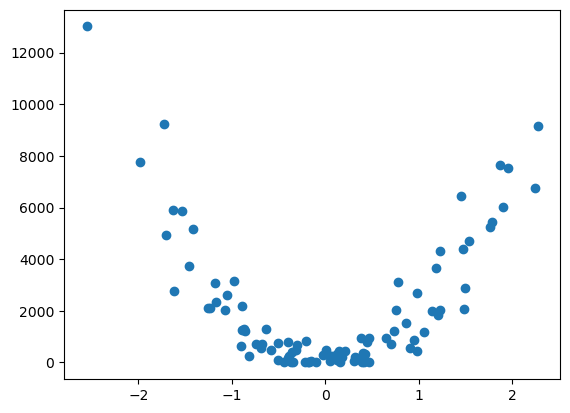

In [10]:
np.random.seed(0)

# création du Dataset 
x, y = make_regression(n_samples=100, n_features=1, noise=10) 
y = y**2 # y ne varie plus linéairement selon x ! 

# On ajoute des variables polynômiales dans notre dataset 
poly_features = PolynomialFeatures(degree=2, include_bias=False) 
x = poly_features.fit_transform(x) 

plt.scatter(x[:,0], y) 
x.shape # la dimension de x: 100 lignes et 2 colonnes

## Prédiction Polynômiale 

maintenant que le datasets est généré nous pouvons de nouveau laisser la machine s'entrainer 

Coeff R2 = 0.894069295821077


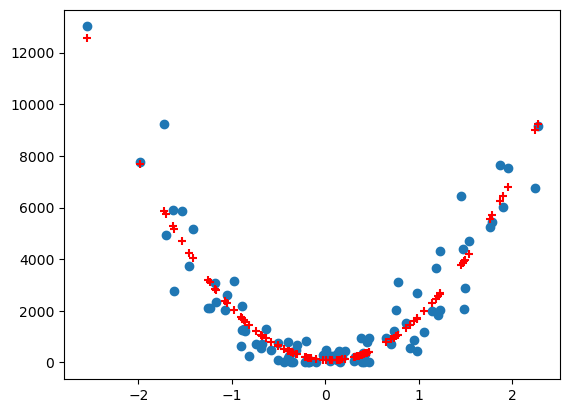

In [13]:
# On entraine le modele comme avant ! rien ne change ! 
model = SGDRegressor(max_iter=10000, eta0=0.001) 
model.fit(x,y) 
print('Coeff R2 =', model.score(x, y))  #on affiche le taux de fiabilité
plt.scatter(x[:,0], y, marker='o') 
plt.scatter(x[:,0], model.predict(x), c='red', marker='+') #on affiche la prediction avec des croix rouge

Bravo nous avons maintenant un modèle de prédiction courbé et non linéaire. 

# Classification binaire

imaginons que nous vous voulons classer un mail comme spam ou non spam il nous faudra diviser nos catégorie en deux types de données exemple Y = 0 ou Y = 1. Commençons !

Nous allons générer de donné aléatoire mes avec la fonction make_classification.

(100, 2)

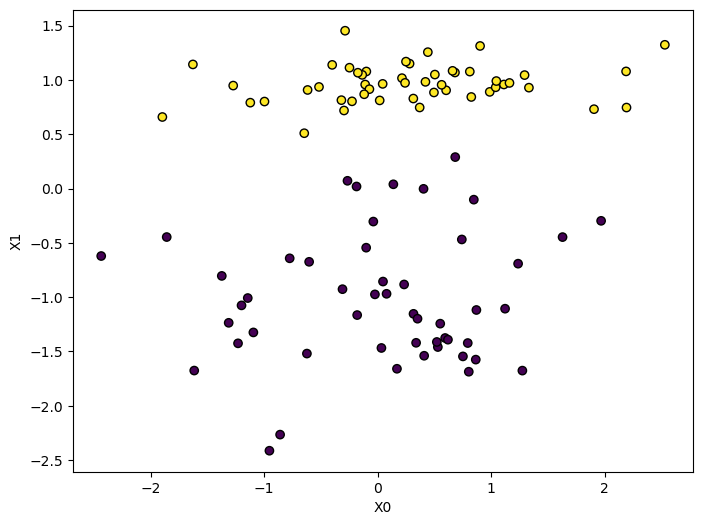

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification 
from sklearn.linear_model import SGDClassifier

# Génération de données aléatoires: 100 exemples, 2 classes, 2 features x0 et x1 
np.random.seed(1) 
x, y = make_classification(n_samples=100,n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1) 

# Visualisation des données 
plt.figure(num=None, figsize=(8, 6)) 
plt.scatter(x[:,0], x[:, 1], marker = 'o', c=y, edgecolors='k') 
plt.xlabel('X0') 
plt.ylabel('X1') 
x.shape

Maintenant nous allons crée un model de prédection qui utilisera SGDClassifier 

In [3]:
# Génération d'un modele en utilisant la fonction cout 'log' pour Logistic Regression
model = SGDClassifier(max_iter=1000, eta0=0.001, loss='log') 

model.fit(X, y) 
print('score:', model.score(x, y))

score: 1.0


Maintenant nous allons afficher le resultat de notre machine

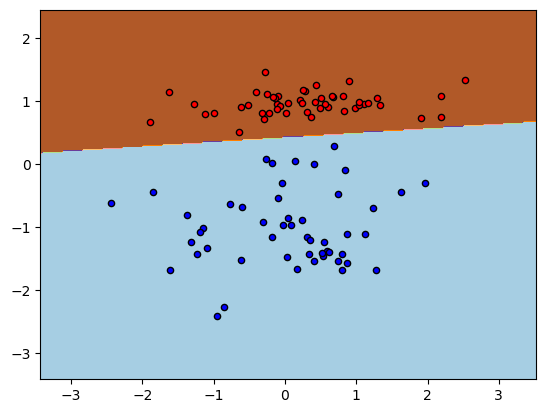

In [6]:
# Visualisation des données
h = .02 
colors = "bry" 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 


Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape) 
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired) 
plt.axis('tight') 


for i, color in zip(model.classes_, colors): 
    idx = np.where(y == i) 
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s=20)
    

Voila malgré un code très complexe nous avons réussi à classer nos données en deux catègorie. Personellement je trouve l'utilisation de toute ses bibliothèques barbante et très peu concrète mais ne vous inquièter nous allons passer à une partie plus marrante.